**Estudo de caso**

Este notebook contém o estudo de caso de classificação dos digitos do dataset Mnist. 

Para tanto será utilizada uma rede neural artificial para realizar a classificação. 

In [108]:
# Import das bibliotecas
# Dataset
from keras.datasets import mnist

# Processamento
from google.colab.patches import cv2_imshow
import cv2 
import numpy as np
import zipfile
import os

# Construção da rede
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Google colab

from google.colab import drive

# Métricas de avaliação
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Salvar o modelo
from keras.models import save_model

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
# Carregando o dataset

(X_treino, y_treino), (X_teste, y_teste) = mnist.load_data()

**Análise exploratoria dos dados**

Objetivos: 
- Visualizar os dados
- Verificar as caracteristicas do dataset

Formato das imagens: 28 x 28 pixels

In [35]:
# Verificando as dimensões da imagem
X_treino[0].shape

(28, 28)

In [36]:
print(y_treino[0])
print(X_treino[0])

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

In [127]:
def mostrar_imagem(imagem):
  ''' Mostra a imagem redimensionada para 200 x 200 pixels
      Parâmetros:
        imagem: Imagem a ser exibida
  ''' 
  cv2_imshow(cv2.resize(imagem, dsize=(200, 200), interpolation=cv2.INTER_CUBIC))

In [128]:
def histograma_imagem(imagem):
  ''' Plota o histograma com as distribuições dos pixels de uma imagem
      Parâmetros:
        imagem: imagem que o histograma será mostrado
  '''
  plt.hist(imagem)

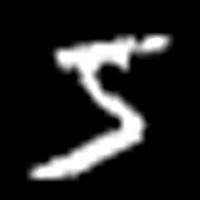

In [129]:
mostrar_imagem(X_treino[0].reshape(28,28))

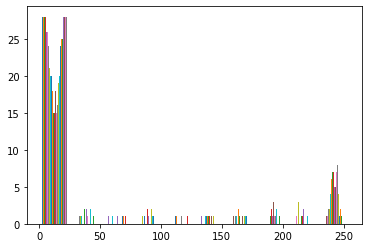

In [9]:
histograma_imagem(X_treino[0])

A função **shape** retorna as dimensões de um vetor

Ela retorna a altura (indice 0), altura (indice 1) e quantidade de canais de cor de uma imagem (indice 2) de uma imagem

In [10]:
# 28 pixels de altura
# 28 pixels de largura
# 0 canais de cor
print(X_treino[0].shape)

(28, 28)


In [37]:
# Total de pixels
altura = X_treino[0].shape[0]
largura = X_treino[0].shape[1]
print(f'Sumário da imagem:\nAltura: {altura} pixels\nLargura: {largura} pixels\nTotal de pixels: {altura * largura} pixels')

Sumário da imagem:
Altura: 28 pixels
Largura: 28 pixels
Total de pixels: 784 pixels


In [38]:
# Informações do dataset de treino
total_amostras = X_treino.shape[0]
altura_amostras = X_treino.shape[1]
largura_amostras = X_treino.shape[2]
print(f'Sumário X_treino:\nTotal de amostras {total_amostras}\nAltura das amostras: {altura_amostras}\nLargura das amostras: {largura_amostras}\nLargura * Altura: {altura*largura}')

Sumário X_treino:
Total de amostras 60000
Altura das amostras: 28
Largura das amostras: 28
Largura * Altura: 784


In [39]:
print(altura * largura * X_treino.shape[0])

47040000


**Pré-processamento**

Objetivos:

- Normalizar o dataset;
- Converter o dataset para vetores, pois são eles que são reconhecidos pela rede neural

In [40]:
def converter_matriz_vetor(matriz):
  ''' Converte uma matriz em um vetor nparray
      Parâmetros:
        matriz -> matriz a ser convertida no vetor
  '''
  return np.asarray([x.ravel() for x in matriz])

In [41]:
# Convertendo de matriz para vetor
X_treino = converter_matriz_vetor(X_treino)
X_teste = converter_matriz_vetor(X_teste)

In [42]:
print(X_treino.shape)

(60000, 784)


In [43]:
print(y_treino.shape)

(60000,)


**Construção do modelo**

Objetivo:

- Contruir a rede neural;
- Treinar a rede neural.

In [24]:
# Número de unidades = quantidades de pixels da entrada = altura * largura da imagem
# As imagens do dataset possuem 28 x 28 pixels, logo
print(f'Número de unidades = {28 * 28}')
# Costuma-se utilizar a seguinte heuristica para determinar a quantidade de unidades
# (qtd de pixels + 2) / 2. Onde qtd de pixels é igual a multiplicação da altura pela largura
# As imagens do dataset possuem 28 x 28 pixels, logo
print(f'Número de unidades = {(28*28 + 2)/2}')

Número de unidades = 784
Número de unidades = 393.0


In [29]:
rede = tf.keras.Sequential()
# Camada de entrada e primeira camada oculta
rede.add(tf.keras.layers.Dense(input_shape = (784,), units = 393, activation = 'relu'))
# 2ª camada oculta
rede.add(tf.keras.layers.Dense(units = 393, activation = 'relu'))
# Camada de saída
rede.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))

In [30]:
# Verificando informações da rede
rede.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 393)               308505    
                                                                 
 dense_2 (Dense)             (None, 393)               154842    
                                                                 
 dense_3 (Dense)             (None, 10)                3940      
                                                                 
Total params: 467,287
Trainable params: 467,287
Non-trainable params: 0
_________________________________________________________________


A função compile compila o modelo

Para isso deve-se passar como parâmetros:

- optimizer: algoritmo para realizar o ajuste dos pesos e encontrar o minímo local;
- loss: função para realizar o cálculo do erro;
- metrics: métrica para avaliação da rede.

In [46]:
rede.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [47]:
# Treinando a rede neural
progresso_treino = rede.fit(X_treino, y_treino, epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 12s 6ms/step - loss: 1.5510 - accuracy: 0.9021
Epoch 2/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2223 - accuracy: 0.9472
Epoch 3/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1777 - accuracy: 0.9542
Epoch 4/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1613 - accuracy: 0.9576
Epoch 5/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1447 - accuracy: 0.9620
Epoch 6/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1303 - accuracy: 0.9665
Epoch 7/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1237 - accuracy: 0.9687
Epoch 8/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1060 - accuracy: 0.9724
Epoch 9/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1064 - accuracy: 0.9730
Epoch 10/50
1875/1875 [==============================] - 11s 6ms/step - l

**Avaliação da rede neural**

Objetivos:

- Avaliar a rede neural;
- Verificar as métricas alcançadas pelas rede.

In [112]:
def plotar_graficos(graficos, titulos):
  fig, axes = plt.subplots(1, len(graficos), figsize = (10, 10), linewidth=3)

  for i in range(0, len(axes)):
    axes[i].plot(graficos[i])
    if len(titulos) > i:
      axes[i].set_title(titulos[i])

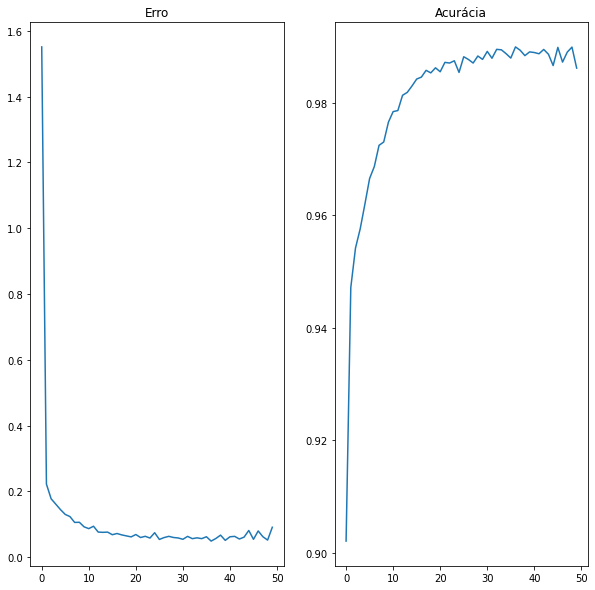

In [113]:
plotar_graficos([progresso_treino.history['loss'],
                 progresso_treino.history['accuracy']],
                 ['Erro', 'Acurácia'])

In [77]:
test_loss, test_acc = rede.evaluate(X_teste, y_teste, verbose=2)

313/313 - 1s - loss: 0.5370 - accuracy: 0.9673 - 1s/epoch - 4ms/step


In [81]:
classificacoes = rede.predict(X_teste)

In [85]:
classificacoes[0], classificacoes.shape, y_teste.shape

(array([0.0000000e+00, 1.0000199e-36, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 1.2205033e-25], dtype=float32), (10000, 10), (10000,))

In [86]:
# Verifica a predição e pega o maior valor como sendo considerada a saída correta
# Converte para inteiro para ser possível verificar na matriz de confusão
classificacao_normalizada = []
for classificacao in classificacoes:
  classificacao_normalizada.append(int(np.argmax(classificacao)))

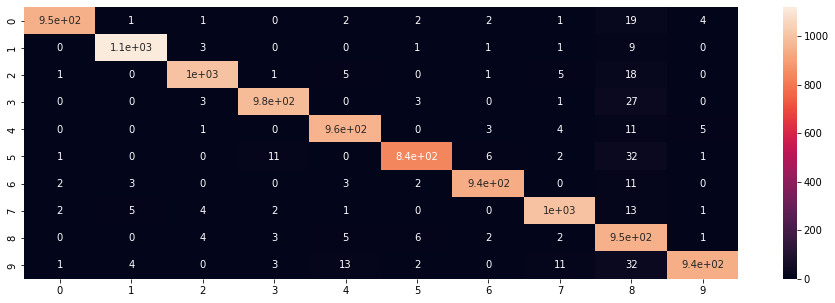

In [90]:
cm = confusion_matrix(y_teste, classificacao_normalizada)
plt.figure(figsize = (16,5))
sns.heatmap(cm, annot = True)

**Verificando as classificacoes**

Objetivo:
- Verificar as previsões do modelo;
- Plotar imagens com as classificações.

In [155]:
def verificar_predicao(indice_classificacao, X, y, classificacao):
  ''' Verifica a predição do modelo mostrando a classe real e a classe predita, bem como o plot da imagem do dataset de teste
      Parâmetros:
        indice_classificacao -> indice do item a ser verificado
        X -> dados de teste
        y -> label dos dados de teste
        classificacao -> dados da classificação realizada pelo modelo
  '''
  classe_real = y[indice_classificacao]
  classe_predita = classificacao[indice_classificacao]
  predicao = 'acertou' if classe_real == classe_predita else 'errou'
  print(f'Classe real: {classe_real}\nClasse predita: {classe_predita}\nModelo { predicao }')
  mostrar_imagem(X[indice_classificacao].reshape(28,28))

Classe real: 7
Classe predita: 7
Modelo acertou


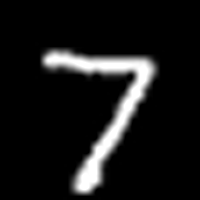

In [143]:
verificar_predicao(0, X_teste, y_teste, classificacao_normalizada)

Classe real: 0
Classe predita: 0
Modelo acertou


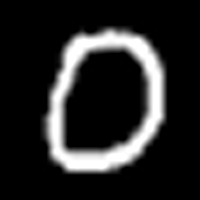

In [144]:
verificar_predicao(10, X_teste, y_teste, classificacao_normalizada)

Classe real: 6
Classe predita: 6
Modelo acertou


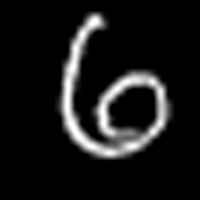

In [145]:
verificar_predicao(100, X_teste, y_teste, classificacao_normalizada)

Classe real: 0
Classe predita: 0
Modelo acertou


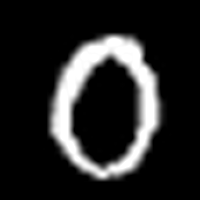

In [146]:
verificar_predicao(13, X_teste, y_teste, classificacao_normalizada)

Classe real: 9
Classe predita: 8
Modelo errou


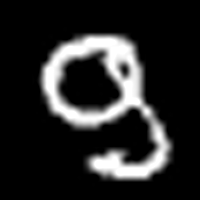

In [153]:
verificar_predicao(151, X_teste, y_teste, classificacao_normalizada)

Classe real: 3
Classe predita: 8
Modelo errou


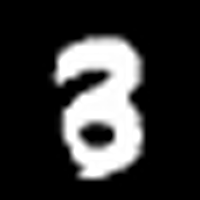

In [154]:
verificar_predicao(1114, X_teste, y_teste, classificacao_normalizada)

**Salvando o modelo**

Objetivos:
- Salvar o modelo em um arquivo para permitir ser carregado posteriomente.

In [91]:
def salvar_modelo_pesos(modelo, nome_arq_modelo, nome_arq_peso):
  ''' Salva o modelo em um arquivo .json e os pesos em um arquivo .hdf5
      Parâmetros:
        modelo -> modelo a ser salvo
        nome_arq_modelo -> nome do arquivo que o modelo será salvo
        nome_arq_peso -> nome do arquivo que os pesos serão salvos
  ''' 
  # Converte o modelo para json
  modelo_json = modelo.to_json()
  # Salva o arquivo do modelo em json
  with open(nome_arq_modelo + '.json', 'w') as json_file:
    json_file.write(modelo_json)
  # Salva os pesos
  # O padrão é salvar em um arquivo .hdf5
  rede_salva = save_model(modelo, nome_arq_peso + '.hdf5')


In [111]:
def carregar_modelo_salvo(arquivo_json_modelo, arquivo_pesos):
  ''' Carrega e retorna o modelo salvo no disco
      Parâmetros:
        arquivo_sjon_modelo ->  Arquivo json contendo o modelo
        arquivo_pesos -> Arquivo com os pesos do modelo
  '''
  with open(arquivo_json_modelo) as json_file:
    modelo_json = json_file.read()
  rede_carregada = tf.keras.models.model_from_json(modelo_json)
  rede_carregada.load_weights(arquivo_pesos)
  return rede_carregada

In [96]:
salvar_modelo_pesos(rede, 'redeNeuralMnistDigit', 'pesosRedeNeuralMnistDigit')

In [109]:
rede_carregada = carregar_modelo_salvo('/content/redeNeuralMnistDigit.json', '/content/pesosRedeNeuralMnistDigit.hdf5')
rede_carregada.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [110]:
rede_carregada.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 393)               308505    
                                                                 
 dense_2 (Dense)             (None, 393)               154842    
                                                                 
 dense_3 (Dense)             (None, 10)                3940      
                                                                 
Total params: 467,287
Trainable params: 467,287
Non-trainable params: 0
_________________________________________________________________


**Conclusão**

O teste foi realizado com uma rede neural simples

As imagens eram pequenas com 28 x 28 pixels de dimensão

O modelo foi treinado com 50 epocas de forma relativamente rápida

As imagens não foram normalizadas, nem processadas

Mesmo assim, o modelo conseguiu se sair bem. Atingiu acurácia de **96%** e tempo de execução de 1 segundo por epoca e 4 ms por passo.

O modelo se saiu bem, mas cabem melhorias. Por ser um caso de estudo simples e reduzido foi possível verificar diversos conceitos relativos a construção de uma rede neural para a classificação de imagens.